# Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Define the parameters used to create the plots
rc = {'figure.figsize':(10,8),
      'axes.facecolor':'white',
      'figure.facecolor':'white',
      'axes.grid' : False,
      'font.size' : 20,    
      'font.sans-serif': 'Arial',
      'font.family': 'sans-serif',
      'svg.fonttype' : 'none' }

# Retina-enriched exons

In [3]:
retina_exons = pd.read_csv('../predictions/retina_exons_predictions.tsv', sep = '\t')

# Apply the function to the acceptor and donor columns
for name in retina_exons.columns[4:7]:
    retina_exons[name] = pd.to_numeric(retina_exons[name].str.split().str[1])
for name in retina_exons.columns[7:10]:
    retina_exons[name] = retina_exons[name].apply(lambda x: pd.to_numeric(x.strip('[]').split()[-1]))
    
# Rename the columns
retina_exons.rename(columns={'retina_acceptor': 'Retina acceptor', 'gtex_acceptor' : 'GTEx acceptor', 'gtex2_acceptor' : 'GTEX standard acceptor',
                             'retina_donor' : 'Retina donor', 'gtex_donor' : 'GTEx donor', 'gtex2_donor' : 'GTEx standard donor'}, inplace=True)

retina_exons.head()

,chr,start,end,strand,Retina acceptor,GTEx acceptor,GTEX standard acceptor,Retina donor,GTEx donor,GTEx standard donor
0,chr17,170631,170657,-1.0,0.06,0.20,0.16,0.18,0.23,0.14
1,chr7,38464089,38464097,-1.0,0.00,0.00,0.00,0.00,0.00,0.00
2,chr17,7655236,7655256,1.0,0.73,0.80,0.65,0.82,0.81,0.72
3,chr2,25111072,25111095,1.0,0.04,0.04,0.02,0.04,0.03,0.02
4,chr19,32380609,32380620,1.0,0.63,0.22,0.51,0.42,0.18,0.19


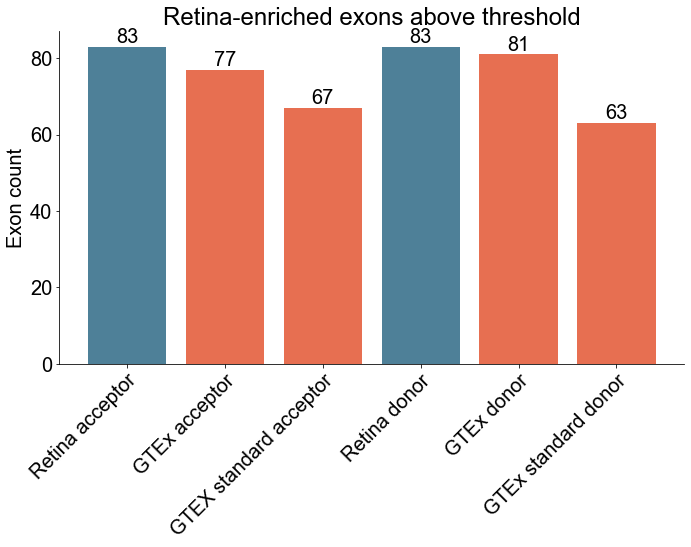

In [7]:
def above_threshold(df, column, threshold):
    return (df[column] >= threshold).sum()
names = retina_exons.columns[4:]
thresholds = [0.22,0.39,0.39,0.22,0.38, 0.38]

counts = []
for name, threshold in zip(names, thresholds):
    counts.append(above_threshold(retina_exons, name, threshold))

import matplotlib.pyplot as plt
plt.rcParams.update(rc)

# Create bar plot
bars = plt.bar(names, counts, color = ['#4E8098', '#E76F51', '#E76F51'])
# Add labels and title
plt.ylabel('Exon count')
plt.title('Retina-enriched exons above threshold')

# Display the plot
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
# Customize the text at the xticks
#plt.xticks(names, ['GTEx acceptor', 'GTEx donor', 'Retina acceptor', 'Retina donor'])

# Remove black x and y axis line
sns.despine(bottom = False, left = False)

# Add text labels on top of the bars
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             count, ha='center', va='bottom')


plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.savefig('Retina_enriched_exons.png',  bbox_inches='tight', dpi = 300)
plt.show()

# Control exons


In [5]:
control_exons = pd.read_csv('../predictions/control_exons_predictions.tsv', sep = '\t')

# Apply the function to the acceptor and donor columns
for name in control_exons.columns[4:7]:
    control_exons[name] = pd.to_numeric(control_exons[name].str.split().str[1])

for name in control_exons.columns[7:10]:
    control_exons[name] = control_exons[name].apply(lambda x: pd.to_numeric(x.strip('[]').split()[-1]))
    
# Rename the columns
control_exons.rename(columns={'retina_acceptor': 'Retina acceptor', 'gtex_acceptor' : 'GTEx acceptor', 'gtex2_acceptor' : 'GTEX standard acceptor',
                             'retina_donor' : 'Retina donor', 'gtex_donor' : 'GTEx donor', 'gtex2_donor' : 'GTEx standard donor'}, inplace=True)

control_exons

,chr,start,end,strand,Retina acceptor,GTEx acceptor,GTEX standard acceptor,Retina donor,GTEx donor,GTEx standard donor
0,11,6402081,6402209,-1.0,0.95,1.0,0.99,0.00,0.00,0.00
1,3,126780339,126780351,1.0,0.00,0.0,0.00,0.00,0.00,0.00
2,12,50401010,50401028,1.0,0.00,0.0,0.00,0.88,0.94,0.99
3,4,76716390,76716410,1.0,0.00,0.0,0.00,0.05,0.27,0.34
4,12,80435082,80435101,1.0,0.00,0.0,0.00,0.27,0.61,0.22
...,...,...,...,...,...,...,...,...,...,...
196,8,123126055,123126080,1.0,0.00,0.0,0.00,0.00,0.00,0.00
197,11,119091860,119091874,1.0,0.00,0.0,0.00,0.00,0.00,0.00
198,4,137521690,137521701,-1.0,0.20,0.6,0.63,0.00,0.00,0.00
199,2,85434472,85434497,1.0,0.00,0.0,0.00,0.43,0.86,0.73


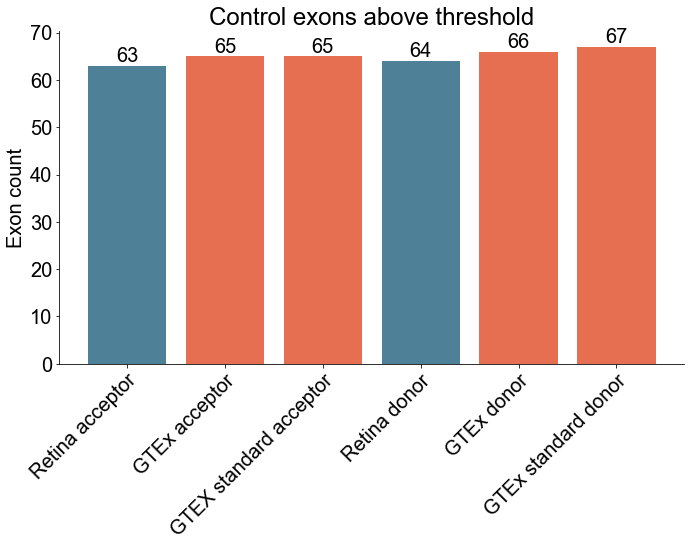

In [6]:
def above_threshold(df, column, threshold):
    return (df[column] >= threshold).sum()
names = control_exons.columns[4:]
thresholds = [0.07,0.20,0.20,0.07,0.19,0.19]

counts = []
for name, threshold in zip(names, thresholds):
    counts.append(above_threshold(control_exons, name, threshold))

import matplotlib.pyplot as plt
plt.rcParams.update(rc)

# Create bar plot
bars = plt.bar(names, counts, color = ['#4E8098', '#E76F51', '#E76F51'])
# Add labels and title
plt.ylabel('Exon count')
plt.title('Control exons above threshold')

# Display the plot
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
# Customize the text at the xticks

# Remove black x and y axis line
sns.despine(bottom = False, left = False)

# Add text labels on top of the bars
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             count, ha='center', va='bottom')


plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.savefig('Control_exons.png',  bbox_inches='tight', dpi = 300)
plt.show()

# Retina-enriched exons not in training data

In [8]:
sas  = pd.read_csv('../predictions/retina_sas_predictions.tsv', sep = '\t')
sds  = pd.read_csv('../predictions/retina_sds_predictions.tsv', sep = '\t')

print(len(sas))
print(len(sds))

115
107


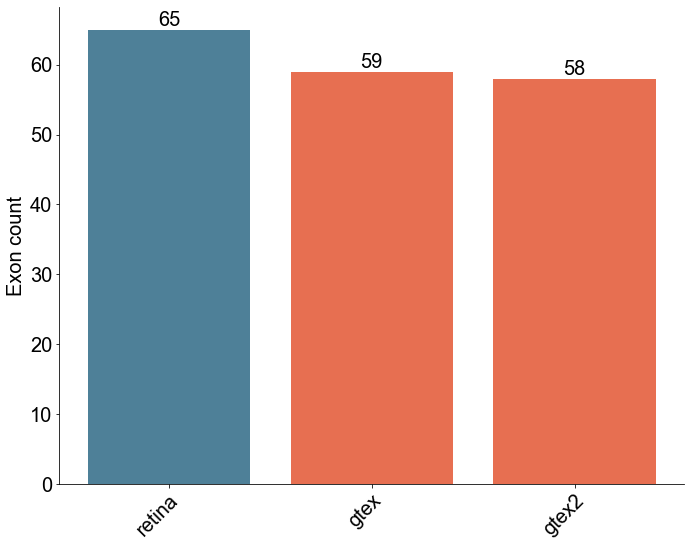

In [9]:
def above_threshold(df, column, threshold):
    return (df[column] >= threshold).sum()
names = sas.columns[3:]
thresholds = [0.07,0.20,0.20]

counts = []
for name, threshold in zip(names, thresholds):
    counts.append(above_threshold(sas, name, threshold))

import matplotlib.pyplot as plt
plt.rcParams.update(rc)

# Create bar plot
bars = plt.bar(names, counts, color = ['#4E8098', '#E76F51', '#E76F51'])
# Add labels and title
plt.ylabel('Exon count')

# Display the plot
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
# Customize the text at the xticks

# Remove black x and y axis line
sns.despine(bottom = False, left = False)

# Add text labels on top of the bars
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             count, ha='center', va='bottom')


plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.savefig('sas.png',  bbox_inches='tight', dpi = 300)
plt.show()

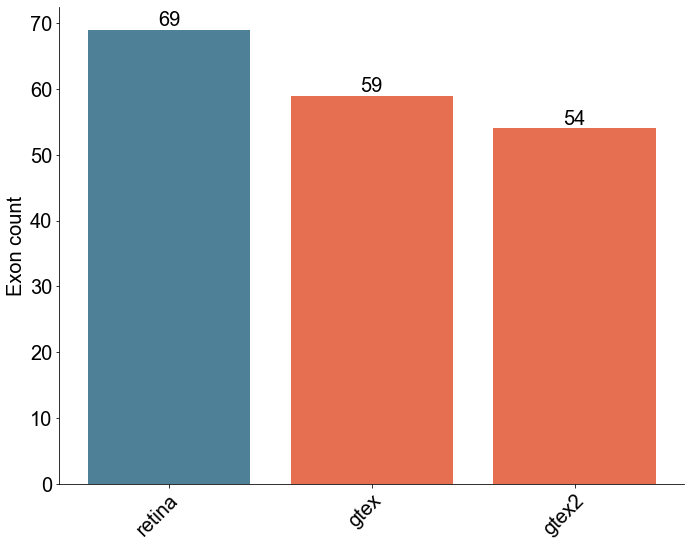

In [10]:
names = sds.columns[3:]
thresholds = [0.07,0.20,0.20]#.0.07,0.19,0.19]

counts = []
for name, threshold in zip(names, thresholds):
    counts.append(above_threshold(sds, name, threshold))

import matplotlib.pyplot as plt
plt.rcParams.update(rc)

# Create bar plot
bars = plt.bar(names, counts, color = ['#4E8098', '#E76F51', '#E76F51'])
# Add labels and title
plt.ylabel('Exon count')

# Display the plot
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
# Customize the text at the xticks

# Remove black x and y axis line
sns.despine(bottom = False, left = False)

# Add text labels on top of the bars
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             count, ha='center', va='bottom')


plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.savefig('sds.png',  bbox_inches='tight', dpi = 300)
plt.show()

# Pacbio predictions

In [12]:
def create_barplot_pacbio(df, thresholds, ylabel, filename):
    names = df.columns[2:]

    counts = []
    for name, threshold in zip(names, thresholds):
        counts.append(above_threshold(df, name, threshold))

    # Create bar plot
    plt.rcParams.update(rc)

    bars = plt.bar(names, counts, color=['#4E8098', '#E76F51', '#E76F51'])

    # Add labels and title
    plt.xlabel('Model')
    plt.ylabel(ylabel)

    # Display the plot
    plt.xticks(rotation=45, ha='right', rotation_mode='anchor')

    plt.xticks(names, ['Retina', 'GTEx', 'GTEx standard'])


    # Remove black x and y axis line
    sns.despine(bottom = False, left = False)

    # Add text labels on top of the bars
    for bar, count in zip(bars, counts):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
                count, ha='center', va='bottom')

    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    plt.savefig(filename,  bbox_inches='tight', dpi = 300)
    plt.show()

All acceptor sites:  11269
Number of acceptor sites without a prediction:  3185


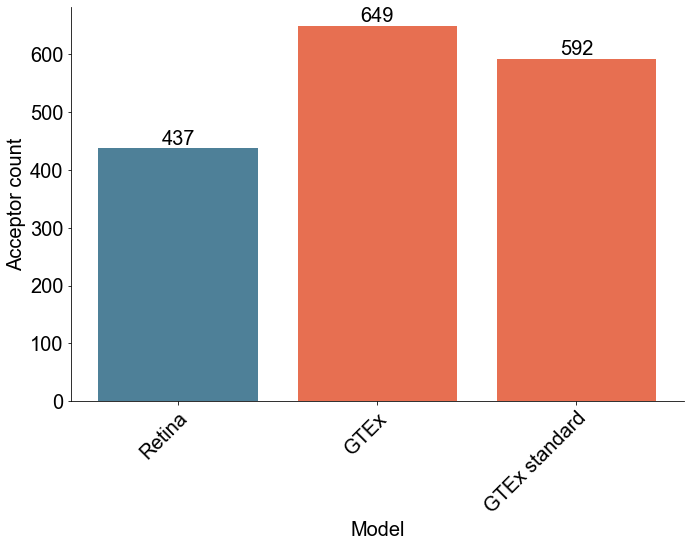

In [13]:
pacbio_acceptors = pd.read_csv('../predictions/pacbio_acceptors_predictions.tsv', sep = '\t')
for name in pacbio_acceptors.columns[2:]:
    pacbio_acceptors[name] = pd.to_numeric(pacbio_acceptors[name].str.split().str[1])

# Drop acceptor sites without a prediction
all_acceptors = len(pacbio_acceptors)
pacbio_acceptors = pacbio_acceptors.dropna()
print('All acceptor sites: ', all_acceptors)
print('Number of acceptor sites without a prediction: ', all_acceptors - len(pacbio_acceptors))

create_barplot_pacbio(pacbio_acceptors, [0.22,0.39, 0.39], 'Acceptor count', 'Pacbio_acceptor.png')

All donor sites:  11805
Number of donor sites without a prediction:  2314


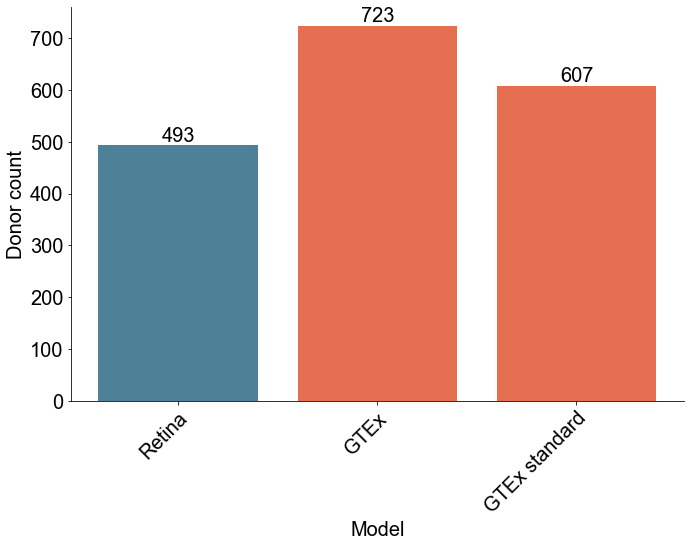

In [14]:
pacbio_donors = pd.read_csv('../predictions/pacbio_donors_predictions.tsv', sep = '\t')

# Drop acceptor sites without a prediction
all_donors = len(pacbio_donors)
pacbio_donors = pacbio_donors[pacbio_donors.apply(lambda row: row[pacbio_donors.columns[2]] != '[]', axis=1)]
print('All donor sites: ', all_donors)
print('Number of donor sites without a prediction: ', all_donors - len(pacbio_donors))

for name in pacbio_donors.columns[2:]:
    pacbio_donors[name] = pacbio_donors[name].apply(lambda x: pd.to_numeric(x.strip('[]').split()[-1]))


create_barplot_pacbio(pacbio_donors, [0.22,0.38, 0.38], 'Donor count', 'Pacbio_donor.png')


# Junctions not in training data